# Task 1 : Prediction using Supervised ML

### **Simple Linear Regression**
In this regression task we will predict the percentage of marks to score, expected by a student based upon the number of hours they studied. This is a simple linear regression task, since it involves only two variables.

**Not for distribution.**

Importing all required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

Import Dataset from local system.

In [2]:
Students_Score = pd.read_csv('C:/Users/akshay/Desktop/DS Sparks Internship/Task 1/student_scores - student_scores.csv')
Students_Score

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
Students_Score.shape

(25, 2)

#### Statistical Summary

In [4]:
Students_Score.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
Students_Score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


We will plot our data and see if we can manually find any relationship between these two variables. We can create the plot with the following script:

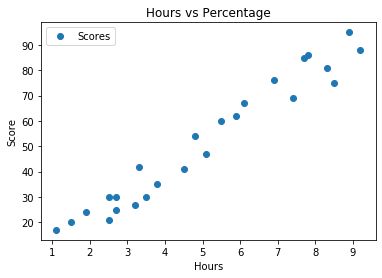

In [6]:
Students_Score.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours')  
plt.ylabel('Score')  
plt.show()

From the plot, we can see that there is a **positive linear relation** between the number of hours studied and percentage of score obtained.

## Preparing the data

Lets assign **x (Independent Variable)** and **y (Target Varialble)** variable of our model.

In [7]:
x = Students_Score.iloc[:, :-1].values  
y = Students_Score.iloc[:, 1].values

print('x variable is\n',x)
print('y variable is\n',y)

x variable is
 [[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
y variable is
 [21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


## Applying Linear Regression Model

Now that we have our **x (Independent Variable)** and **y (Target Varialble)**, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [8]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0) 

In [9]:
from sklearn.linear_model import LinearRegression  
linearRegressor = LinearRegression()  
linearRegressor.fit(x_train, y_train) 

print("Training completed.")

Training completed.


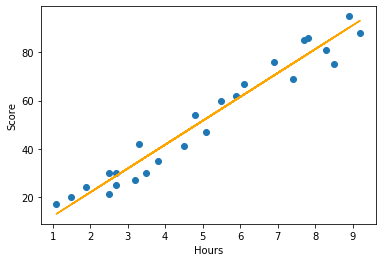

In [10]:
line = linearRegressor.coef_*x + linearRegressor.intercept_

plt.scatter(x, y)
plt.plot(x, line, color = 'Orange')
plt.xlabel("Hours")  
plt.ylabel("Score")
plt.show()

Checking the Accuracy.

In [11]:
print('For Test Score:')
print(linearRegressor.score(x_test, y_test))
print('For Training Score:')
print(linearRegressor.score(x_train, y_train))

For Test Score:
0.9454906892105356
For Training Score:
0.9515510725211553


# Making Predictions

Now we have trained our algorithm, Let's make some predictions.

In [12]:
print(x_test)
y_pred = linearRegressor.predict(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [13]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [14]:
y_pred= linearRegressor.predict(x_test)  
x_pred= linearRegressor.predict(x_train)


In [15]:
# You can also test with your own data
print('Percentage Score of student who studied for 9.25 hours a day', linearRegressor.predict([[9.25]]))

Percentage Score of student who studied for 9.25 hours a day [93.69173249]


## Model Evaluation

As we are dealing with numerical data, Mean Absolute Error,Mean Squared Error would be a great choice for a metric for evaluating the Linear Regression model.

In [16]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174


**Conclusion**
After successful model building and obtaining predictions on test data, we can conclude that 'if a student studies for 9.25 hours/day, he is expected to score **93.69** marks.